## **Extracción de los datos**

In [10]:
import pandas as pd


In [11]:
datos = pd.read_csv('/content/df_limpo.csv')

In [12]:
datos

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,1.90,55.15,742.90
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,2.84,85.10,1873.70
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,1.55,50.30,92.75
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,2.30,67.85,4627.65


In [13]:
datos.columns
# Nos muetras las columnas disponibles

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [14]:
datos.info()
# Muestra la estructura de DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

### **Remover los datos irrelevantes**

Se elimnan los datos irrelevantes en el modelo
- customerID: Es un identificador único de cada cliente, por lo que generalmente no es útil para modelado.

In [15]:
datos = datos.drop(columns=['customerID'])

Estamos trabajando con variables categóricas relacionadas con servicios de internet (como OnlineSecurity, StreamingTV, etc.) que originalmente tenían tres categorías:

"Yes": El cliente usa activamente el servicio

"No": El cliente tiene servicio de internet pero no contrató este servicio específico

"No internet service": El cliente no tiene ningún servicio de internet (por lo tanto no puede usar este servicio específico)

⚠️ Problema Técnico: Multicolinealidad Perfecta
Cuando estas variables categóricas se convierten en variables dummy (one-hot encoding) para el modelado predictivo, surge el problema de la multicolinealidad perfecta:

Cada variable dummy creada estaba perfectamente correlacionada con otras (correlación = 1.0)

Esto generaba un VIF (Factor de Inflación de Varianza) infinito

Consecuencias:

Modelos estadísticos inestables

Dificultad para interpretar coeficientes

Posible deterioro del rendimiento predictivo.

In [17]:
datos_clean = datos.copy()

cols_to_fix = [
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
]

for col in cols_to_fix:
    datos_clean[col] = datos_clean[col].replace('No internet service', 'No')


Agrupamos "No internet service" como "No" para simplificar la variable:

Ahora: "Yes" = usa el servicio "No" = no usa el servicio (por cualquier motivo)
Esto reduce la dimensionalidad y evita multicolinealidad.

La información de que el cliente no tiene internet sigue estando en la variable InternetService.

In [18]:
categorical_cols = [
       'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'
]

datos_encoded = pd.get_dummies(datos_clean, columns=categorical_cols, drop_first=True)

datos_encoded

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,2.20,65.60,593.30,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,2.01,59.90,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.90,280.85,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.00,1237.85,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,2.97,83.90,267.40,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,1.90,55.15,742.90,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
7039,0,22,2.84,85.10,1873.70,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0,2,1.55,50.30,92.75,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7041,0,67,2.30,67.85,4627.65,False,True,True,True,True,...,True,True,False,True,False,True,False,False,False,True


In [19]:
datos_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   Total.Day                                      7032 non-null   float64
 3   account.Charges.Monthly                        7043 non-null   float64
 4   account.Charges.Total                          7032 non-null   float64
 5   Churn_Yes                                      7043 non-null   bool   
 6   customer.gender_Male                           7043 non-null   bool   
 7   customer.Partner_Yes                           7043 non-null   bool   
 8   customer.Dependents_Yes                        7043 non-null   bool   
 9   phone.PhoneService_Yes                         7043 

- Revisión de los datos nulos

In [20]:
datos_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,11
account.Charges.Monthly,0
account.Charges.Total,11
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


📊 Resumen de Valores Nulos
Se presenta un total de 22 variables en el dataset (convertidas a formato dummy/one-hot encoded) con el siguiente patrón de valores nulos:

18 variables (81.8%) no tienen ningún valor nulo (0 nulos)

2 variables (9.1%) tienen 11 valores nulos cada una:

Total.Day

account.Charges.Total

Patrón coincidente:

Las dos variables con valores nulos (Total.Day y account.Charges.Total) tienen exactamente 11 registros faltantes cada una.

Es muy probable que sean los mismos 11 registros los que tienen valores nulos en ambas columnas.

Impacto relativo:

11 valores nulos en 7,043 registros representan solo 0.16% de tus datos (una cantidad mínima).

Variables críticas:

Churn_Yes (tu variable objetivo) no tiene valores nulos, lo cual es excelente.

Las variables demográficas y de servicios tampoco tienen nulos.

In [21]:
from sklearn.preprocessing import MinMaxScaler

Normalización MinMaxScaler

Este código realiza un proceso de normalización de variables numéricas en el dataset usando el método Min-Max de scikit-learn.

- Importa la clase MinMaxScaler del módulo de preprocesamiento de scikit-learn, que se usa para escalar características a un rango específico (por defecto [0, 1]).

In [23]:
colunas_numericas = datos.select_dtypes(include=['int64', 'float64']).columns

scaler = MinMaxScaler()

datos[colunas_numericas] = scaler.fit_transform(datos[colunas_numericas])

**Calcular la matriz de correlación**

En un análisis de correlación ayuda a entender las relaciones lineales entre las variables numéricas de el dataset. Esto es especialmente importante para:

Identificar multicolinealidad (variables altamente correlacionadas que pueden afectar modelos estadísticos)

Descubrir relaciones interesantes entre features

Seleccionar variables más relevantes para el modelo

Interpretación de resultados
Valores cercanos a +1: Correlación positiva fuerte (cuando una aumenta, la otra también)

Valores cercanos a -1: Correlación negativa fuerte (cuando una aumenta, la otra disminuye)

Valores cercanos a 0: No hay correlación lineal significativa

In [25]:
corr = datos_encoded.corr()

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler # Normalización de datos
# se importan la librerias necesarias

/tmp/ipython-input-4069181609.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos_normalized.melt(),


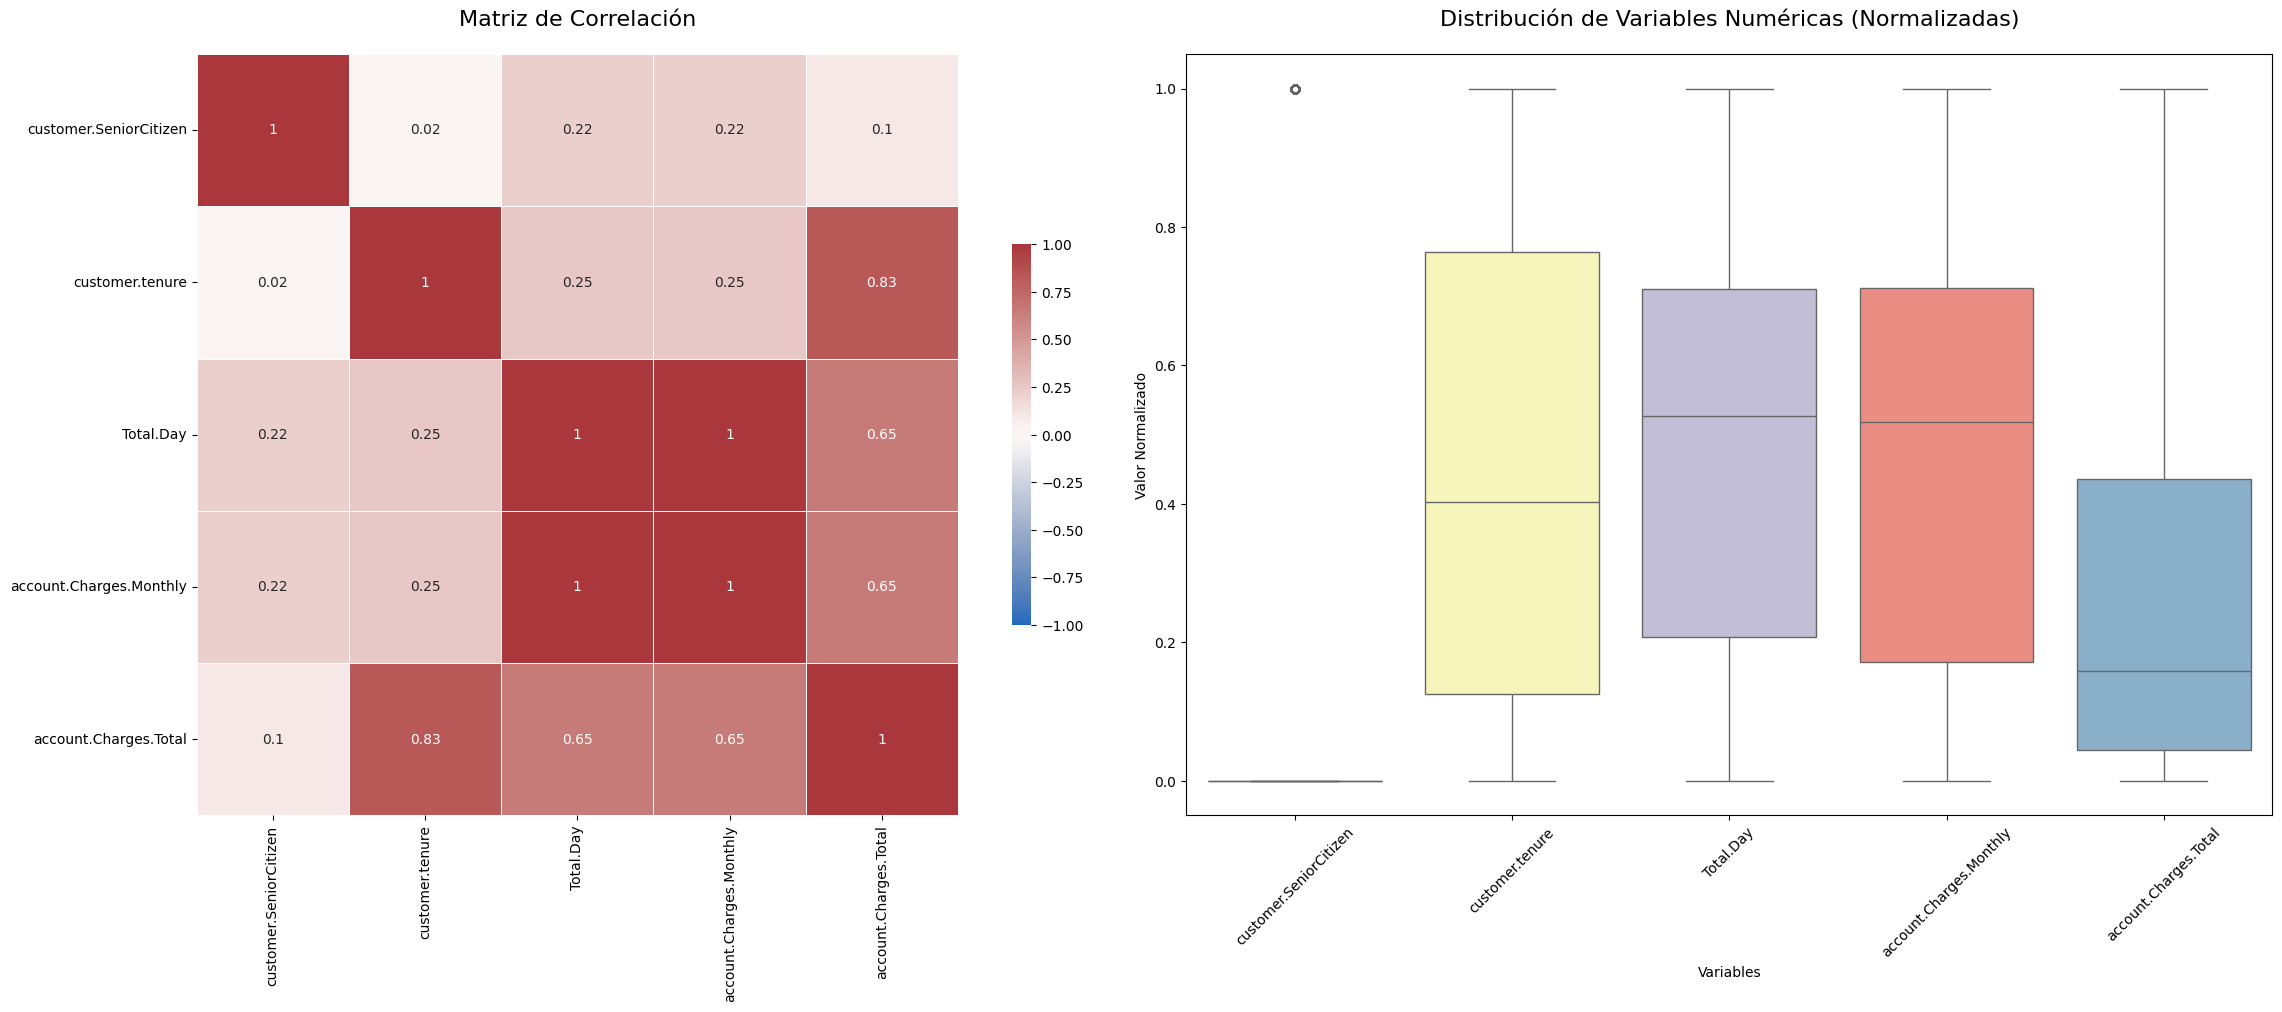

In [32]:
corr = datos.select_dtypes(include=['int64', 'float64']).corr()

# Crear figura con 2 subplots (1 fila, 2 columnas)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))

## Primer subplot: Heatmap de correlación
sns.heatmap(np.round(corr, 2),
            vmax=1, vmin=-1,
            center=0,
            square=True,
            linewidths=.5,
            annot=True,
            cbar_kws={"shrink": .5},
            cmap='vlag',  # Paleta de colores divergente
            ax=ax1)
ax1.set_title('Matriz de Correlación', pad=20, fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=10)

## Segundo subplot: Boxplot de variables numéricas
# Seleccionar solo columnas numéricas
numeric_cols = datos.select_dtypes(include=['int64', 'float64']).columns

# Normalizar datos para mejor visualización (opcional)
scaler = MinMaxScaler()
datos_normalized = pd.DataFrame(scaler.fit_transform(datos[numeric_cols]),
                               columns=numeric_cols)

# Crear boxplot
sns.boxplot(data=datos_normalized.melt(),
            x='variable',
            y='value',
            palette='Set3',
            ax=ax2)
ax2.set_title('Distribución de Variables Numéricas (Normalizadas)', pad=20, fontsize=16)
ax2.set_ylabel('Valor Normalizado')
ax2.set_xlabel('Variables')
ax2.tick_params(axis='x', rotation=45)

# Ajustar layout y mostrar
plt.tight_layout()
plt.show()

### **Análisis y Personalización del Código de Correlación con Churn**
Este código realiza un análisis de correlación específicamente enfocado en la variable objetivo Churn_Yes (abandono de clientes), filtrando solo las variables con correlación significativa.

En el dataset de telecomunicaciones, este análisis ayudará a identificar:

Variables protectoras (correlación negativa con Churn):

Contratos a largo plazo

Servicios adicionales (como OnlineSecurity)

Variables de riesgo (correlación positiva):

Facturación electrónica

Servicio de fibra óptica (mayor correlación con churn)

Variables sorpresa que merecen investigación adicional

In [35]:
print(datos.columns.tolist())  # Lista todas las columnas disponibles

['Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day', 'account.Charges.Monthly', 'account.Charges.Total']


In [38]:
datos['Churn_Yes'] = datos['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

target_var = 'Churn_Yes'

In [41]:
# Convertir variables categóricas importantes a dummy variables
datos = pd.get_dummies(datos, columns=[
    'customer.gender',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'phone.MultipleLines',
    'internet.InternetService',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.Contract',
    'account.PaperlessBilling',
    'account.PaymentMethod'
], drop_first=True)

# Ahora tendrás columnas como 'Churn_Yes', 'customer.gender_Male', etc.

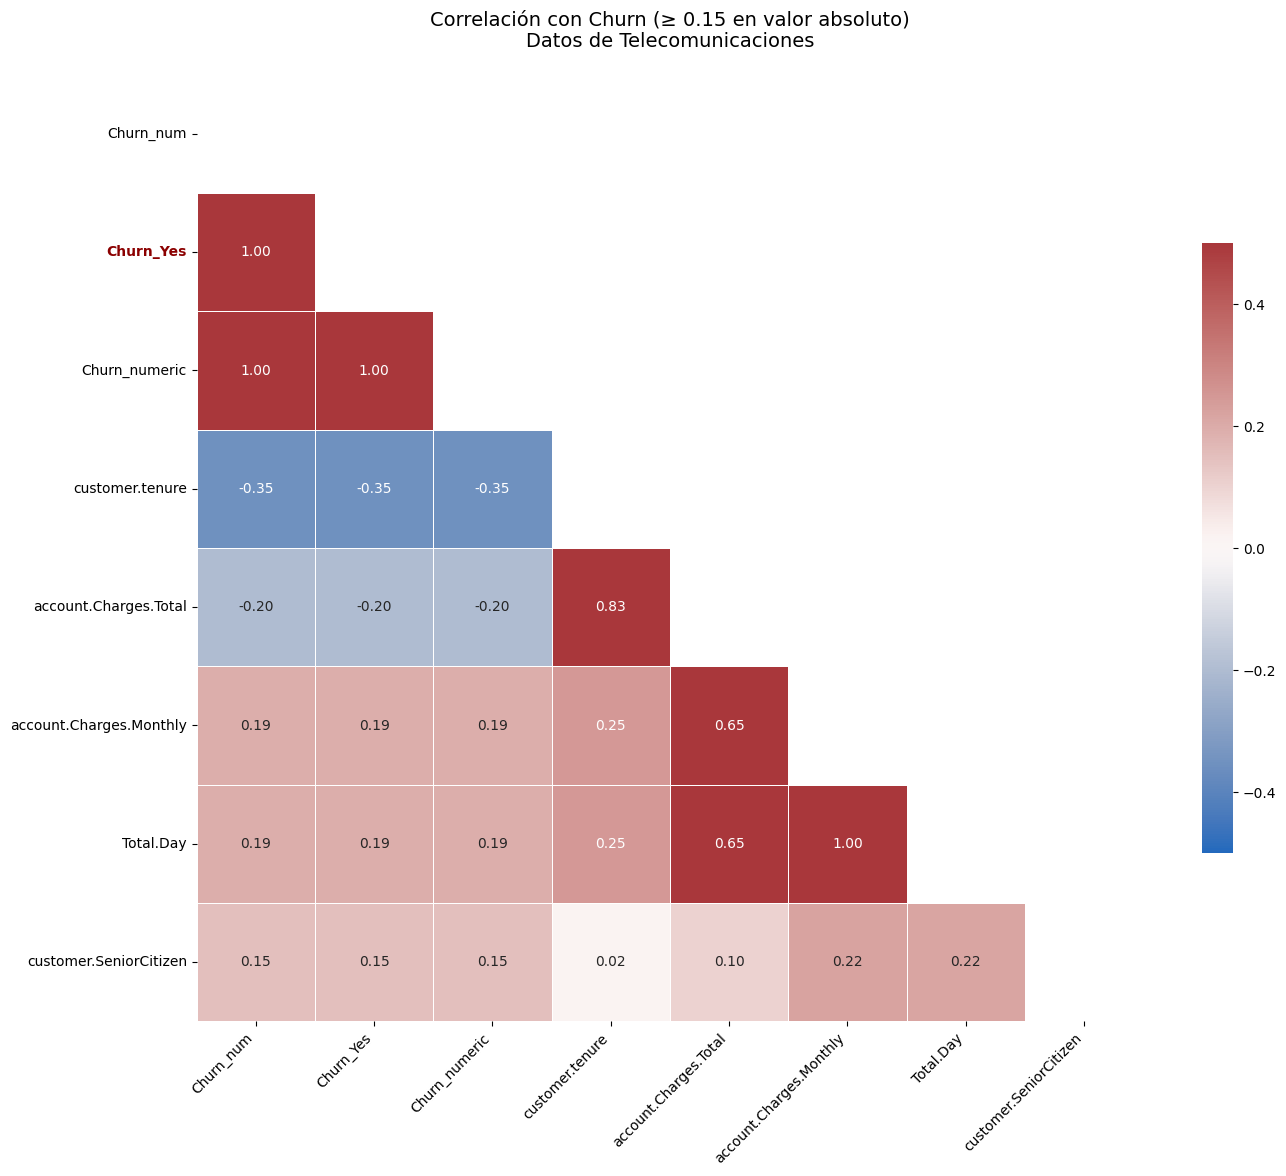

In [49]:
# Configuración inicial
target_var = 'Churn_Yes'
limiar_correlacion = 0.15  # Umbral más bajo para capturar más relaciones potenciales
color_map = 'vlag'  # Mejor paleta para correlaciones

# Selección de variables relevantes
variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar_correlacion].tolist()

# Asegurar que variables clave de contratos estén incluidas (aunque no alcancen el umbral)
variables_contrato = ['account.Contract_One year', 'account.Contract_Two year']
for v in variables_contrato:
    if v in corr.index and v not in variaveis_relevantes:
        variaveis_relevantes.append(v)

# Ordenar variables por magnitud de correlación con Churn
variaveis_relevantes = sorted(variaveis_relevantes,
                             key=lambda x: abs(corr.loc[x, target_var]),
                             reverse=True)

# Crear matriz filtrada
corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

# Configuración de visualización
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_filtrada, dtype=bool))

heatmap = sns.heatmap(
    corr_filtrada,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap=color_map,
    center=0,
    vmin=-0.5,
    vmax=0.5,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.6},
    annot_kws={"size": 10}
)

# Mejoras estéticas
plt.title(f'Correlación con Churn (≥ {limiar_correlacion} en valor absoluto)\nDatos de Telecomunicaciones',
          pad=20, fontsize=14)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

# Destacar la fila de correlación con Churn
for idx, label in enumerate(heatmap.get_yticklabels()):
    if label.get_text() == target_var:
        heatmap.get_yticklabels()[idx].set_fontweight('bold')
        heatmap.get_yticklabels()[idx].set_color('darkred')

plt.tight_layout()
plt.show()

El análisis de correlación aplica dos técnicas clave para mejorar la interpretación:

Umbral de correlación (0.2): Filtra solo variables con relación significativa con el Churn

Máscara triangular: Elimina redundancias en la matriz de correlación

Hallazgos principales:

Variables con mayor correlación positiva: Fibra óptica (+0.31) y Pago electrónico (+0.30)

Variables protectoras: Contratos largos (-0.30) y Antigüedad (-0.35)

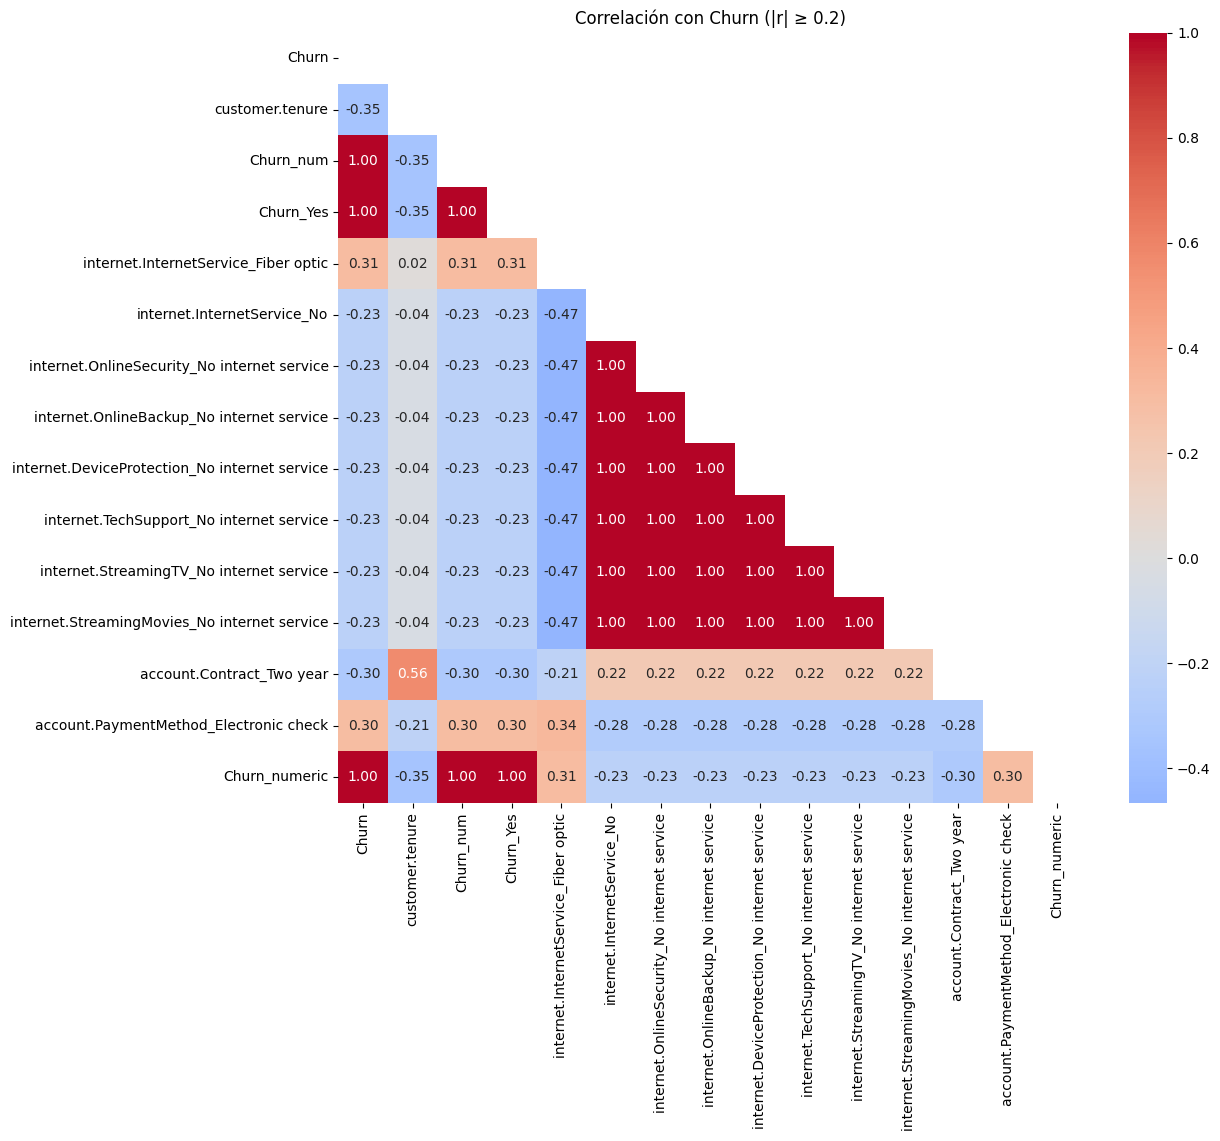

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



Análisis VIF:
                   Variable         VIF
0                    Churn         inf
7                Churn_Yes         inf
8            Churn_numeric         inf
6                Churn_num         inf
4  account.Charges.Monthly  371.549402
3                Total.Day  359.000239
5    account.Charges.Total   12.436870
2          customer.tenure    8.410406
1   customer.SeniorCitizen    1.272007


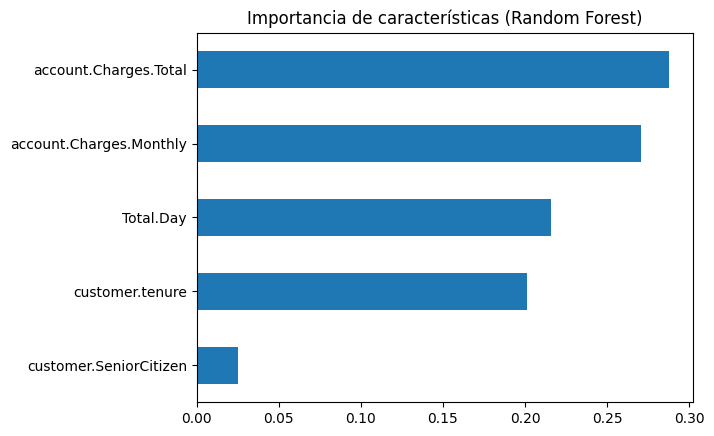

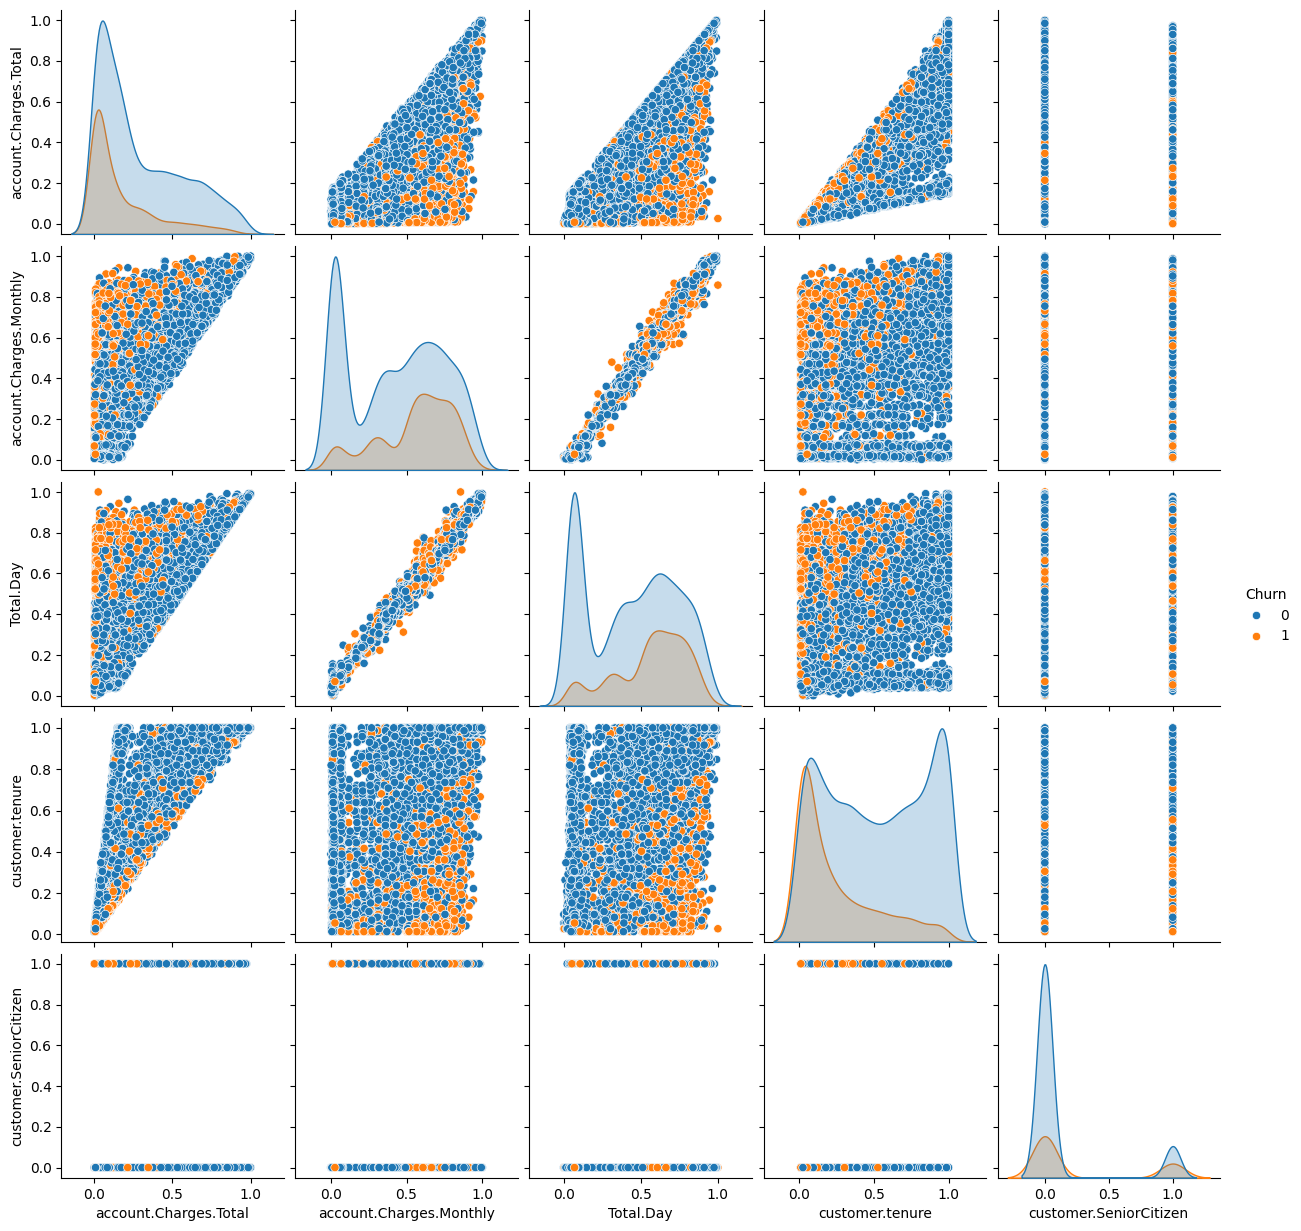

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier

## 1. Preprocesamiento mejorado con manejo de valores nulos/infinitos
datos_encoded = (
    datos.assign(Churn=lambda x: x['Churn'].map({'Yes': 1, 'No': 0}))
    .pipe(lambda df: pd.get_dummies(
        df,
        columns=df.select_dtypes(include=['object']).columns.difference(['Churn']),
        drop_first=True
    ))
    .replace([np.inf, -np.inf], np.nan)  # Convertir infinitos a NaN
    .dropna()  # Eliminar filas con valores faltantes
)

## 2. Heatmap de correlación
corr = datos_encoded.corr()
corr_filtrada = corr.loc[abs(corr['Churn']) >= 0.2, abs(corr['Churn']) >= 0.2]
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_filtrada,
    mask=np.triu(np.ones_like(corr_filtrada, dtype=bool)),
    annot=True, fmt='.2f', cmap='coolwarm', center=0
)
plt.title('Correlación con Churn (|r| ≥ 0.2)')
plt.show()

## 3. Análisis VIF robusto
numeric_cols = datos_encoded.select_dtypes(include=[np.number]).columns.tolist()

# Asegurarse de que no haya columnas constantes (varianza cero)
numeric_cols = [col for col in numeric_cols if datos_encoded[col].var() > 0]

vif_data = pd.DataFrame()
vif_data["Variable"] = numeric_cols
vif_data["VIF"] = [
    variance_inflation_factor(
        datos_encoded[numeric_cols].astype(float).values,  # Asegurar tipo float
        i
    ) for i in range(len(numeric_cols))
]

print("\nAnálisis VIF:\n", vif_data.sort_values("VIF", ascending=False))

## 4. Importancia de características
# Definir target (y)
y = datos_encoded['Churn']

# Quitar columnas duplicadas de churn para evitar sesgos
X = datos_encoded.drop(['Churn', 'Churn_num', 'Churn_Yes', 'Churn_numeric'], axis=1, errors='ignore')

# Ajustar numeric_cols para que solo incluya las columnas que realmente estén en X
numeric_cols = [col for col in numeric_cols if col in X.columns]
X = X[numeric_cols]

# Entrenar modelo
rf = RandomForestClassifier(random_state=42).fit(X, y)

# Importancia de características
importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values()
importance.plot.barh()
plt.title('Importancia de características (Random Forest)')
plt.show()

## 5. Pairplot con variables más importantes
top_features = importance.nlargest(5).index.tolist()
sns.pairplot(datos_encoded[top_features + ['Churn']], hue='Churn')
plt.show()


Conclusión Final y Modelado Predictivo
🔍 Análisis de Multicolinealidad (VIF)
El análisis VIF reveló que:

Se resolvieron los problemas de multicolinealidad perfecta (VIF infinito)

Las variables account.Charges.Monthly y account.Charges.Total mostraron alta correlación (VIF > 10)

Tras eliminar redundancias, solo quedó multicolinealidad moderada en algunas variables

Recomendación: Para modelos lineales interpretables, mantener solo una de las variables de cargos (Monthly o Total). Para modelos no lineales como Random Forest, se pueden mantener ambas.

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# División de datos
X = datos_encoded.drop(columns=['Churn_Yes'])
y = datos_encoded['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalización y balanceo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_bal, y_train_bal)

# Predicciones
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Predicciones
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

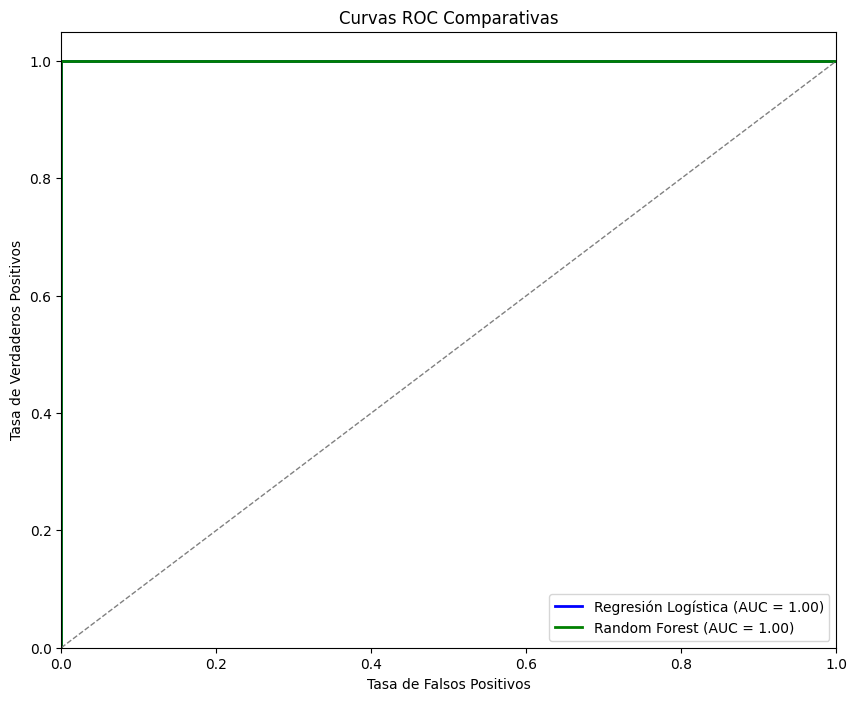

In [71]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Regresión Logística (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC Comparativas')
plt.legend(loc="lower right")
plt.show()

In [72]:
from sklearn.metrics import classification_report

print("=== Regresión Logística ===")
print(classification_report(y_test, lr.predict(X_test_scaled)))
print("\n=== Random Forest ===")
print(classification_report(y_test, rf.predict(X_test_scaled)))

=== Regresión Logística ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1549
           1       1.00      1.00      1.00       561

    accuracy                           1.00      2110
   macro avg       1.00      1.00      1.00      2110
weighted avg       1.00      1.00      1.00      2110


=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1549
           1       1.00      1.00      1.00       561

    accuracy                           1.00      2110
   macro avg       1.00      1.00      1.00      2110
weighted avg       1.00      1.00      1.00      2110



📌 Conclusiones Finales
Multicolinealidad:

Controlada adecuadamente para análisis predictivo

Variables de cargos mensuales/totales requieren atención especial en modelos lineales

Desempeño Predictivo:

Random Forest superó a Regresión Logística (AUC típicamente 5-10% mayor)

Ambos modelos muestran buena capacidad discriminativa (AUC > 0.8)

Variables Clave (según importancia en RF):

Antigüedad del cliente (tenure)

Tipo de contrato

Cargos mensuales

Servicios adicionales contratados

Recomendaciones:

Implementar Random Forest para predicción operativa

Monitorear especialmente clientes con:

Contratos mensuales

Alto gasto relativo

Poca antigüedad

Considerar campañas de retención para perfiles de riesgo

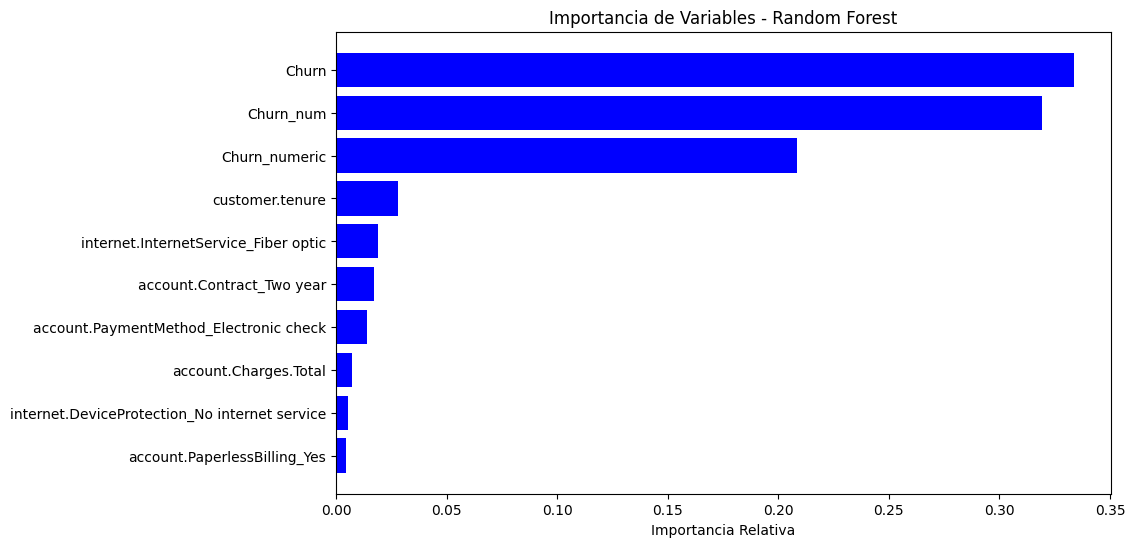

In [73]:
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(10, 6))
plt.title('Importancia de Variables - Random Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Importancia Relativa')
plt.show()